## Los rectángulos fundamentales en el mapeo de Hénon




In [1]:
using PyPlot
using TaylorSeries
using ValidatedNumerics
using StaticArrays

In [2]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

3-element Array{Any,1}:
 "/home/evelyn/julia0.6/julia-903644385b/local/share/julia/site/v0.6"
 "/home/evelyn/julia0.6/julia-903644385b/share/julia/site/v0.6"      
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       

In [3]:

using ParametrizacionMetodo

Usaremos el mapeo inverso para calcular la variedad estable y el mapeo normal para la inestable

In [4]:
"""
Henon(x::Any,y::Any,a::Real,b::Real)


Función que define el mapeo de Hénon

#Argumentos
 
x,y : entradas del vector
a,b : parámetros del mapeo

Esta función regresa un nuevo vector arreglo con entradas [x,y]
"""

function Henon(x,y,a,b)
  
    x_n = a-b*y-x^2
    y_n = x 

    return [x_n,y_n]
end

Henon

In [5]:
"""
HenonI(x::Any, y::Any,a::Real,b::Real)
Se trata de una función que implementa el mapeo de Hénon inverso

#Argumentos

x,y :: Entradas del vector
a,b :: Valores de los parámetros
"""
function HenonI(x,y,a,b)
    
    x_n = y
    y_n = (x+y^2-a)/(-b)
    
    return [x_n,y_n]
end

HenonI

Esta función calcula el punto fijo de acuerdo al parámetro del mapeo.

In [6]:
"""
parametro(a::Real)

Es una función que recibe el valor a del parámetro del mapeo de Hénon y suponiendo que el valor de b=1.0 calcula el punto
fijo asociado.

"""


function parametro(a)
    x1 = -1.+(1.+a)^.5
    x2 = -1.-(1.+a)^.5
    return [x2,x2]
end
    

parametro

Calculamos con un valor del parámetro $a=1.5$ y definimos las funciones henon1 y henon2 que son las que usaremos en el método de parametrización.


In [7]:
a=6.5
uno = 1.
henonA(x,y)=Henon(x,y,a,uno)
henonB(x,y)=HenonI(x,y,a,uno)
puntof1 = parametro(a)

2-element Array{Float64,1}:
 -3.73861
 -3.73861

In [8]:
Orden = 90 #Para llegar a la 6 iteración
x_fijo = puntof1 #punto fijo
tiempo = [1.,3.] #tiempo de evaluación
delta_t = tiempo[2]/1000. #paso del tiempo de evaluación
W_eG, f_eG, vec_eG, val_eG = Inestable(henonA,Orden,puntof1,tiempo, delta_t) # variedad  estable
W_iG, f_iG, vec_iG, val_iG = Inestable(henonB, Orden ,puntof1, tiempo, delta_t) #variedad inestable

(TaylorSeries.Taylor1{Float64}[ - 3.7386127875258306 - 0.9908490602410868 t - 0.021144656610015373 t² - 0.00010795824258162265 t³ - 2.2820411370282075e-7 t⁴ - 2.35440193663895e-10 t⁵ - 1.3911985749930946e-13 t⁶ - 5.179290533325397e-17 t⁷ - 1.2911545290882956e-20 t⁸ - 2.256478658391721e-24 t⁹ - 2.8746899420712283e-28 t¹⁰ - 2.7581974445243236e-32 t¹¹ - 2.0467971421497365e-36 t¹² - 1.2003436973908945e-40 t¹³ - 5.662679654054831e-45 t¹⁴ - 2.1812720128251176e-49 t¹⁵ - 6.9498214030221e-54 t¹⁶ - 1.852542122491384e-58 t¹⁷ - 4.173905789705464e-63 t¹⁸ - 8.022798068691627e-68 t¹⁹ - 1.326707077266002e-72 t²⁰ - 1.901998026307375e-77 t²¹ - 2.3803562035297184e-82 t²² - 2.6169821167812446e-87 t²³ - 2.5419299294327746e-92 t²⁴ - 2.1927161246302785e-97 t²⁵ - 1.687760956112398e-102 t²⁶ - 1.164204983734732e-107 t²⁷ - 7.225493412954166e-113 t²⁸ - 4.04970963878758e-118 t²⁹ - 2.056761399878672e-123 t³⁰ - 9.49585694672464e-129 t³¹ - 3.9973733913213524e-134 t³² - 1.5386124979440775e-139 t³³ - 5.429417884135021e

In [9]:
"""
evaluar(Tiempo::Array{T,1},paso::Real,A::Taylor1{1},B::Talor1{T},PuntoFijo::Real,col::color)

Es una función que evalúa los polinomios A,B en el intervalo Tiempo y regresa dos arreglos con los valores de las evaluaciones.
"""
function evaluar(Tiempo, paso,A,B,PuntoFijo,col)
    ValX=Float64[]
    ValY=Float64[]
    push!(ValX, PuntoFijo[1]) 
    push!(ValY, PuntoFijo[2])

    for t = Tiempo[1]:paso:Tiempo[2]
        
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="None",marker =",",color=col)
    title("Espacio Fase (a=6.5)")
    legend(loc="upper right",fancybox="true")
    xlim(-10.,10.)
    ylim(-10.,10.)
    xlabel("x")
    ylabel("y")
    #grid("on")
    return ValX,ValY
    
end

evaluar

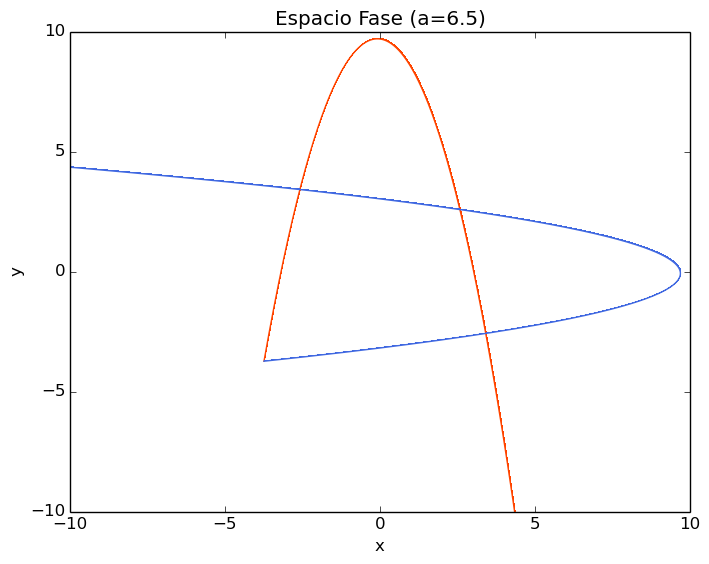

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


([-3.73861, -3.73861, -3.71385, -3.68912, -3.66442, -3.63974, -3.61509, -3.59046, -3.56586, -3.54129  …  -28.5616, -28.5816, -28.6017, -28.6217, -28.6418, -28.6619, -28.6819, -28.702, -28.722, -28.7421], [-3.73861, -3.73861, -3.73524, -3.73187, -3.72849, -3.72512, -3.72175, -3.71838, -3.715, -3.71163  …  6.08584, 6.08746, 6.08907, 6.09068, 6.09229, 6.0939, 6.09551, 6.09712, 6.09873, 6.10034])

In [10]:
figure(3)
ite1e=evaluar([0.,100], 0.025, W_eG[1],W_eG[2],x_fijo,"orangered")
ite1I=evaluar([0.,-100.], -0.025, W_iG[1],W_iG[2],x_fijo,"royalblue")


In [13]:
function Interseccion(p)
    (x,y)=p
    V= SVector(W_eG[1](x)-W_iG[1](y), W_eG[2](x)-W_iG[2](y) )
    
end

Interseccion (generic function with 1 method)

In [26]:
X = (0..400.)×(-400..0.) # 2D IntervalBox;

In [28]:
r=roots(Interseccion,X,Newton, 1e-3)

4-element Array{IntervalRootFinding.Root{IntervalArithmetic.IntervalBox{2,Float64}},1}:
 Root([64.5937, 64.5938] × [-8.79904, -8.79903], :unique)
 Root([55.4054, 55.4055] × [-55.4055, -55.4054], :unique)
 Root([0, 0.000963294] × [-0.000963294, 0], :unknown)    
 Root([8.79903, 8.79904] × [-64.5938, -64.5937], :unique)

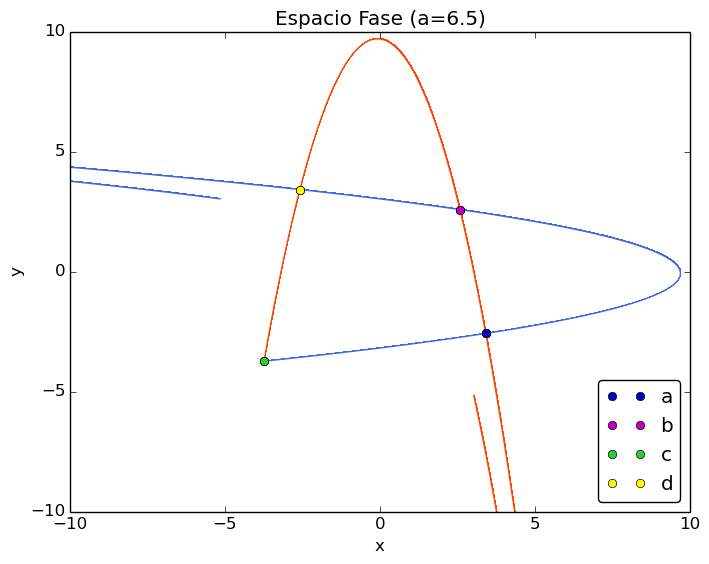

PyObject <matplotlib.legend.Legend object at 0x7f89f5da17d0>

In [30]:
evaluar([0.,400.12], 0.025, W_eG[1],W_eG[2],x_fijo,"orangered")
evaluar([0.,-400.12], -0.025, W_iG[1],W_iG[2],x_fijo,"royalblue")
colores = ["mediumblue", "m","limegreen","yellow","red","blueviolet","aqua","magenta"]
nombre = ["a","b","c","d","e","f","g","h"]
for ind in eachindex(r)
    plot(W_eG[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         W_eG[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]),"o",color =colores[ind],label=nombre[ind])
end
legend(loc="lower right",fancybox="true" )

In [10]:
a=parse(BigFloat,"6.5")
uno = parse(BigFloat,"1.")
henon1(x,y)=Henon(x,y,a,uno)
henon2(x,y)=HenonI(x,y,a,uno)
puntof1 = parametro(a)


2-element Array{BigFloat,1}:
 -3.738612787525830567284848914004010669763723474989916271134472248662466385613599
 -3.738612787525830567284848914004010669763723474989916271134472248662466385613599

Calculamos las variedades usando las funciones antes definidas.

In [11]:
Orden = 250 #Para llegar a la 6 iteración
x_fijo = puntof1 #punto fijo
tiempo = [big(0.),big(3.)] #tiempo de evaluación
delta_t = big(tiempo[2]/1000.) #paso del tiempo de evaluación
W_e, f_e, val_e, vec_e = Inestable(henon2,Orden,puntof1,tiempo, delta_t); # variedad  estable
W_i, f_i, val_i, vec_i = Inestable(henon1, Orden ,puntof1, tiempo, delta_t); #variedad inestable

Graficamos hasta un valor del parámetro 100 en dónde ya se ha formado el rectángulo fundamental

In [12]:
figure(3)
ite1e=evaluar([0.,-100], -0.025, W_e[1],W_e[2],x_fijo,"orangered")
ite1I=evaluar([0.,100.], 0.025, W_i[1],W_i[2],x_fijo,"royalblue")

colores = ["mediumblue", "m","limegreen","yellow","red","blueviolet","aqua","magenta"]
nombre = ["a","b","c","d","e","f","g","h"]
for ind in eachindex(r)
    plot(W_eG[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         W_eG[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]),"o",color =colores[ind],label=nombre[ind])
end
legend(loc="lower right",fancybox="true" )




/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


LoadError: [91mUndefVarError: r not defined[39m

Calculamos el error asociado hasta un valor del parámetro igual a 400

In [13]:
tiem = [0.,big(400.)]
ErrorE = CalculoError(henon2, W_e,f_e,tiem,big(0.025 ));
ErrorI = CalculoError(henon1, W_i,f_i,tiem,big(0.025 ));


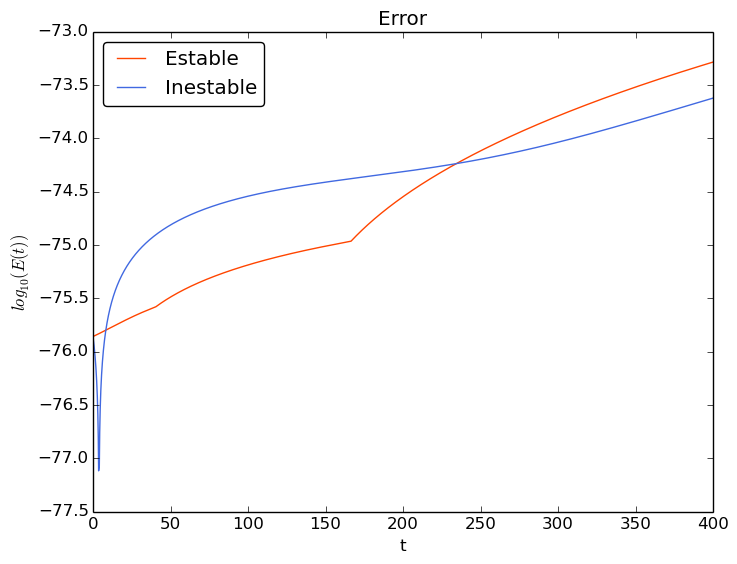

/usr/lib/pymodules/python2.7/matplotlib/legend.py:317: UserWarning: Unrecognized location "low right". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes.iterkeys())))


PyObject <matplotlib.legend.Legend object at 0x7f054908f710>

In [12]:
plot(ErrorE[1],log10.(ErrorE[2]),marker= ",",linestyle="None",label="Estable",color="orangered")
plot(ErrorI[1],log10.(ErrorI[2]),marker= ",",linestyle="None", label="Inestable",color="royalblue")
xlabel("t")
ylabel(L"$log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

Iteramos los polinomios con las funciones de Hénon

In [14]:
#como ambas fueron calculadas con la función de hénon "normal" la aplicamos
W1_e=henon1(W_e[1],W_e[2]);
W1_i=henon2(W_i[1],W_i[2]);

Graficamos las nuevas parametrizaciones en el intervalo [0,100]

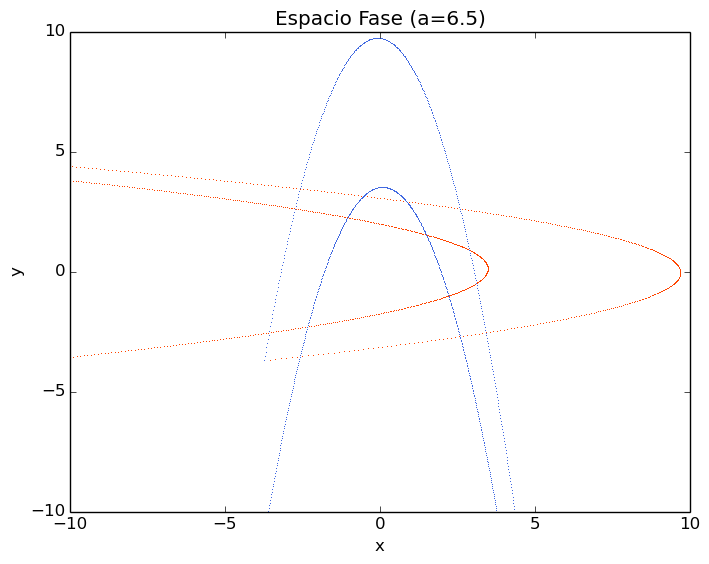

([-3.73861, -3.73861, -3.71385, -3.68912, -3.66442, -3.63974, -3.61509, -3.59046, -3.56586, -3.54129  …  -28.5616, -28.5816, -28.6017, -28.6217, -28.6418, -28.6619, -28.6819, -28.702, -28.722, -28.7421], [-3.73861, -3.73861, -3.55748, -3.37776, -3.19947, -3.02258, -2.84711, -2.67303, -2.50036, -2.32909  …  -815.349, -816.497, -817.646, -818.795, -819.945, -821.097, -822.248, -823.401, -824.555, -825.709])

In [15]:
evaluar([0.,-100], -0.025, W1_e[1],W1_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], 0.025, W1_i[1],W1_i[2],x_fijo,"royalblue")

Mientras que para obtener la misma figura usando la parametrización se debe llegar a un valor de t=500

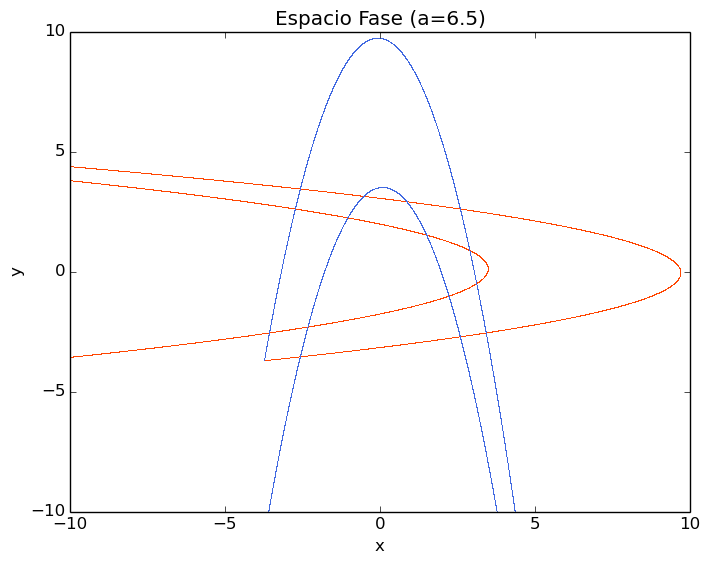

([-3.73861, -3.73861, -3.73524, -3.73187, -3.72849, -3.72512, -3.72175, -3.71838, -3.715, -3.71163  …  -4.79066, -4.79287, -4.79509, -4.79731, -4.79953, -4.80174, -4.80396, -4.80618, -4.8084, -4.81062], [-3.73861, -3.73861, -3.71385, -3.68912, -3.66442, -3.63974, -3.61509, -3.59046, -3.56586, -3.54129  …  -20.1667, -20.1883, -20.2098, -20.2314, -20.2529, -20.2745, -20.2961, -20.3177, -20.3393, -20.361])

In [16]:
evaluar([0.,-500], -0.025, W_e[1],W_e[2],x_fijo,"orangered") 
evaluar([0.,500], 0.025, W_i[1],W_i[2],x_fijo,"royalblue")

Para evaluar el error de las iteraciones aplicaremos la misma idea del error en la parametrización. Si usamos la ecuación de invariancia como partida
\begin{eqnarray}
f_{k}(P(t))=P(\lambda t)
\end{eqnarray}
al aplicar el mapeo inverso
\begin{eqnarray}
f^{-1}_{k}(f_{k}(P(t)))=f^{-1}_{k}(P(\lambda t))
\end{eqnarray}
por lo que al restar el lado derecho y tomar la norma infinito
\begin{eqnarray}
E=\parallel P(t)-f^{-1}_{k}(P(\lambda t)) \parallel_{\infty}
\end{eqnarray}

usando el cambio de variables
\begin{eqnarray}
E=\parallel P(\lambda^{-1}t)-f^{-1}_{k}(P(t)) \parallel_{\infty}
\end{eqnarray}



In [17]:
ErrorEstable(t)=W_e(t/(val_e[1]))-W1_e(t)
ErrorInestable(t)=W_i(t/val_i[1])-W1_i(t)


ErrorInestable (generic function with 1 method)

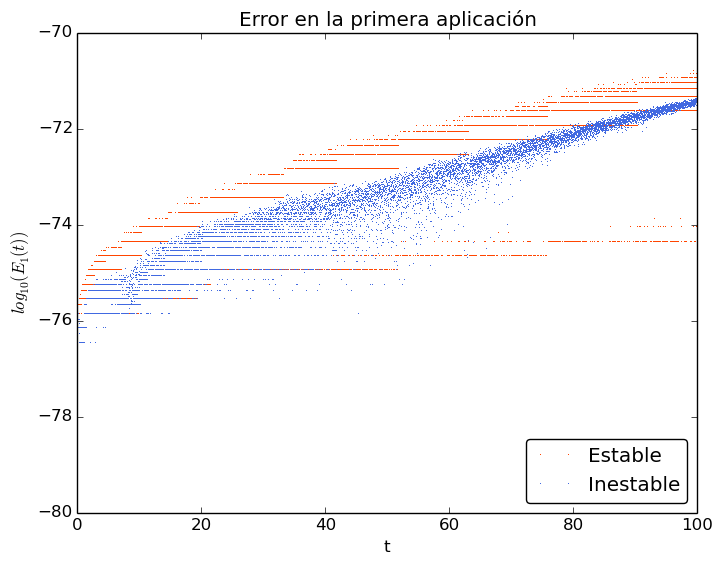

PyObject <matplotlib.legend.Legend object at 0x7effdacddd50>

In [18]:
#Error de la primera aplicación
ValorEstable=BigFloat[]
TiempoE=BigFloat[]
for t =0:0.01:100
    x=ErrorEstable(t)
    norma=norm(x,Inf)+1e-120
    push!(ValorEstable,norma)
    push!(TiempoE,t)
end


ValorInestable=BigFloat[]
TiempoI=BigFloat[]
for t =0:0.01:100
    x=ErrorInestable(t)
    norma=norm(x,Inf)+1e-120
    push!(ValorInestable,norma)
    push!(TiempoI,t)
end



plot(TiempoE,log10.(ValorEstable),marker=",",linestyle="None",label="Estable" ,color="orangered")
plot(TiempoI,log10.(ValorInestable),marker=",",linestyle="None",label="Inestable",color="royalblue" )
title("Error en la primera aplicación")
xlabel("t")
ylim(-80,-70)
ylabel(L"log_{10}(E_{1}(t))")
legend(loc="lower right",fancybox="true" )
    
    

Aplicamos el mapeo de nuevo ahora a la anterior parametrización. Lo que sería la segunda iteración

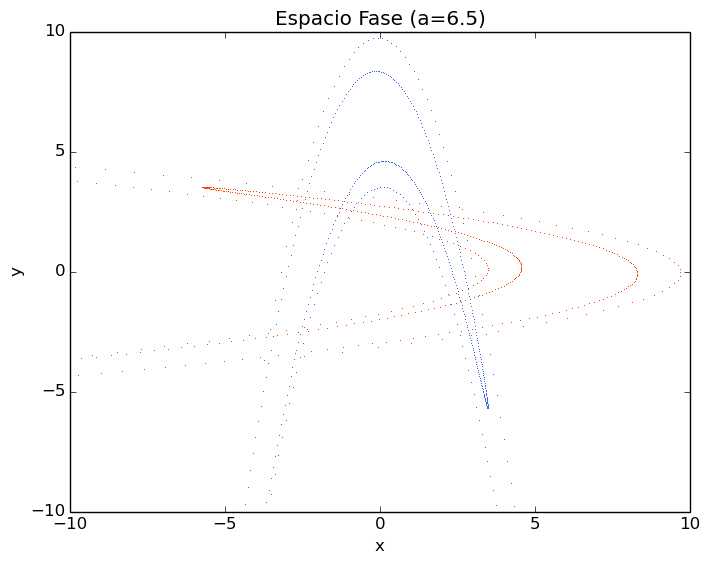

([-3.73861, -3.73861, -3.55748, -3.37776, -3.19947, -3.02258, -2.84711, -2.67303, -2.50036, -2.32909  …  -815.349, -816.497, -817.646, -818.795, -819.945, -821.097, -822.248, -823.401, -824.555, -825.709], [-3.73861, -3.73861, -2.4418, -1.22017, -0.0721736, 1.00374, 2.00908, 2.94535, 3.81405, 4.61664  …  -6.6476e5, -6.66633e5, -6.6851e5, -6.70391e5, -6.72275e5, -6.74164e5, -6.76057e5, -6.77954e5, -6.79855e5, -6.8176e5])

In [19]:
#como ambas fuero calculadas con la función de hénon "normal" la aplicamos
W2_e=henon1(W1_e[1],W1_e[2]) #usamos ahora el mapeo inverso
W2_i=henon2(W1_i[1],W1_i[2])
evaluar([0.,-100], -0.025, W2_e[1],W2_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], 0.025, W2_i[1],W2_i[2],x_fijo,"royalblue")

error de la segunda iteración

In [20]:
henon1(W_e(10./val_e[1])[1],W_e(10./val_e[1])[2])-henon1(W1_e(10.)[1],W1_e(10.)[2])

2-element Array{BigFloat,1}:
 -1.131959884853339045938639911360973972585316399767392273697826861241937664824106e-72
 -2.210859150104177824098906076876902290205696093295688034566068088363159501609581e-75

In [21]:
ErrorEstable2(t)=henon1(W_e(t/val_e[1])[1],W_e(t/val_e[1])[2])-henon1(W1_e(t)[1],W1_e(t)[2])
ErrorInestable2(t)=henon2(W_i(t/val_i[1])[1],W_i(t/val_i[1])[2])-henon2(W1_i(t)[1],W1_i(t)[2])

ErrorInestable2 (generic function with 1 method)

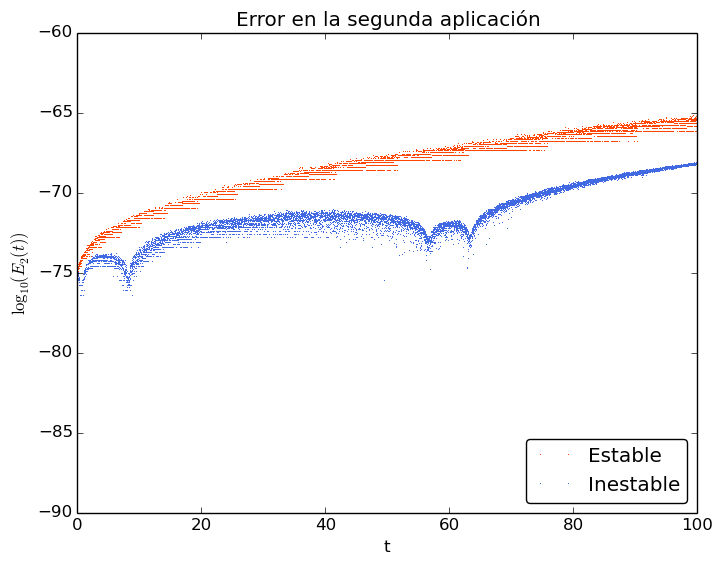

PyObject <matplotlib.legend.Legend object at 0x7effda34e5d0>

In [22]:
#Error de la 2° aplicación
ValorEstable2=BigFloat[]
TiempoE2=BigFloat[]
for t =0:0.01:100
    x=ErrorEstable2(t)
    norma=norm(x,Inf)+1e-120
    push!(ValorEstable2,norma)
    push!(TiempoE2,t)
end


ValorInestable2=BigFloat[]
TiempoI2=BigFloat[]
for t =0:0.01:100
    x=ErrorInestable2(t)
    norma=norm(x,Inf)+1e-120
    push!(ValorInestable2,norma)
    push!(TiempoI2,t)
end



plot(TiempoE2,log10.(ValorEstable2),marker=",",linestyle="None",label="Estable" ,color="orangered")
plot(TiempoI2,log10.(ValorInestable2),marker=",",linestyle="None",label="Inestable",color="royalblue" )
title("Error en la segunda aplicación")
xlabel("t")
ylim(-90,-60)
ylabel(L"\log_{10}(E_{2}(t))")
legend(loc="lower right",fancybox="true" )
    
    

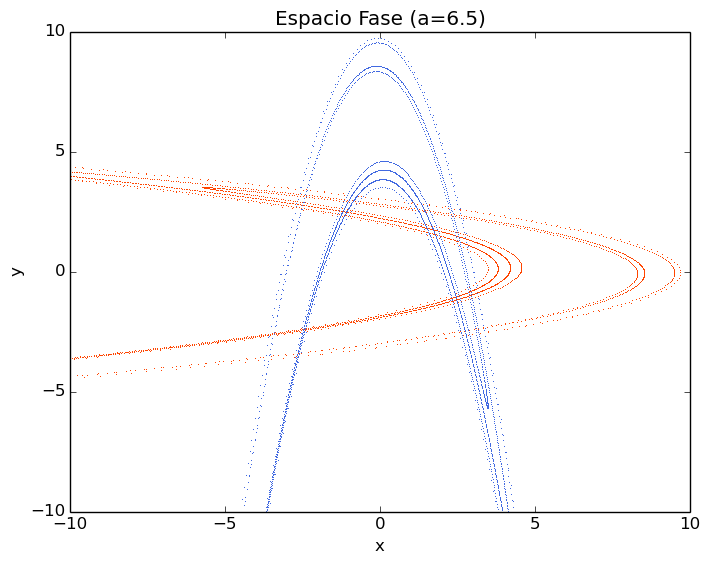

([-3.73861, -3.73861, -3.6055, -3.47316, -3.34158, -3.21076, -3.08071, -2.95141, -2.82288, -2.6951  …  -6.80046e5, -6.80236e5, -6.80426e5, -6.80617e5, -6.80807e5, -6.80998e5, -6.81188e5, -6.81379e5, -6.8157e5, -6.8176e5], [-3.73861, -3.73861, -2.77922, -1.86057, -0.982039, -0.143021, 0.657095, 1.41891, 2.14303, 2.83004  …  -4.62462e11, -4.62721e11, -4.6298e11, -4.63239e11, -4.63498e11, -4.63758e11, -4.64018e11, -4.64277e11, -4.64537e11, -4.64797e11])

In [23]:
W3_e=henon1(W2_e[1],W2_e[2]) 
W3_i=henon2(W2_i[1],W2_i[2])
evaluar([0.,-100], -0.0025, W3_e[1],W3_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], 0.0025, W3_i[1],W3_i[2],x_fijo,"royalblue")

In [24]:
aa(t)=henon1(henon1(W_e(t/val_e[1])[1],W_e(t/val_e[1])[2])[1],henon1(W_e(t/val_e[1])[1],W_e(t/val_e[1])[2])[2])
ErrorEstable3(t)=aa(t)-henon1(W2_e(t)[1],W2_e(t)[2])
bb(t)=henon2(henon2(W_i(t/val_i[1])[1],W_i(t/val_i[1])[2])[1],henon2(W_i(t/val_i[1])[1],W_i(t/val_i[1])[2])[2])
ErrorInestable3(t)=bb(t)-henon2(W2_i(t)[1],W2_i(t)[2])

ErrorInestable3 (generic function with 1 method)

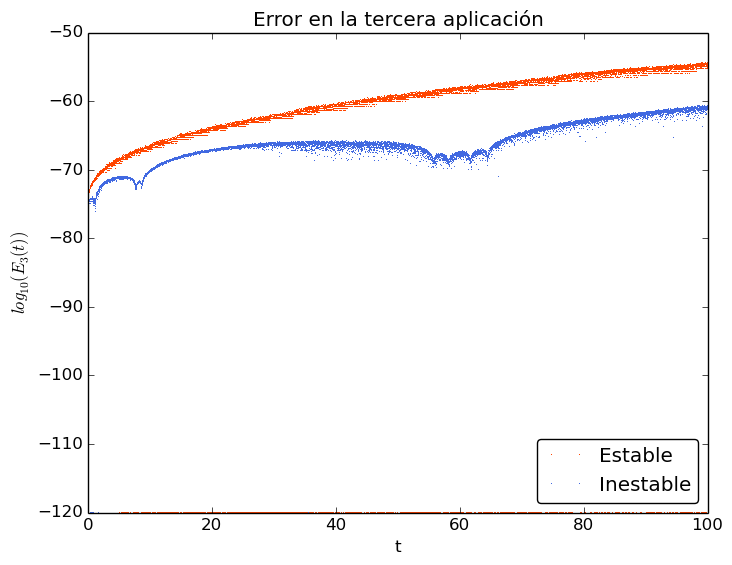

PyObject <matplotlib.legend.Legend object at 0x7effd7a3eb10>

In [38]:
#Error de la tercera aplicación
ValorEstable3=BigFloat[]
TiempoE3=BigFloat[]
for t =0:0.01:100
    x=ErrorEstable3(t)
    norma=norm(x,Inf)+1e-120
    push!(ValorEstable3,norma)
    push!(TiempoE3,t)
end


ValorInestable3=BigFloat[]
TiempoI3=BigFloat[]
for t =0:0.01:100
    x=ErrorInestable3(t)
    norma=norm(x,Inf)+1e-120
    push!(ValorInestable3,norma)
    push!(TiempoI3,t)
end

#legend_elements = [Line2D([0], [0], color="orangered", lw=4, label="Estable"),
 #                  Line2D([0], [0], color="royalblue", lw=4, label="Inestable")]

plot(TiempoE3,log10.(ValorEstable3),marker=",",linestyle="None",label="Estable",color="orangered")
plot(TiempoI3,log10.(ValorInestable3),marker=",",linestyle="None",label="Inestable",color="royalblue" )
title("Error en la tercera aplicación")
xlabel("t")
ylabel(L"log_{10}(E_{3}(t))")
legend(loc="lower right",fancybox="true")

    
    

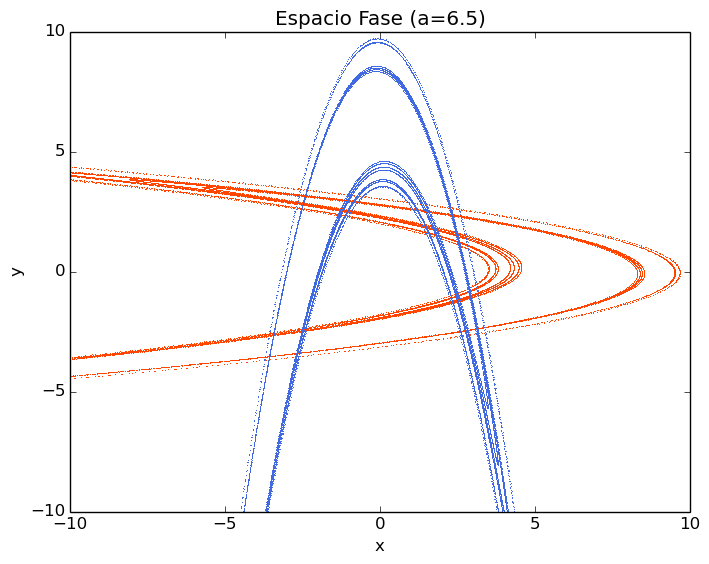

([-3.73861, -3.73861, -3.64082, -3.54344, -3.44648, -3.34993, -3.25378, -3.15805, -3.06273, -2.96782  …  -4.64563e11, -4.64589e11, -4.64615e11, -4.64641e11, -4.64667e11, -4.64693e11, -4.64719e11, -4.64745e11, -4.64771e11, -4.64797e11], [-3.73861, -3.73861, -3.03032, -2.34407, -1.67962, -1.03673, -0.415149, 0.185359, 0.765036, 1.32412  …  -2.15819e23, -2.15843e23, -2.15867e23, -2.15891e23, -2.15915e23, -2.1594e23, -2.15964e23, -2.15988e23, -2.16012e23, -2.16036e23])

In [26]:
W4_e=henon1(W3_e[1],W3_e[2]) 
W4_i=henon2(W3_i[1],W3_i[2])
evaluar([0.,-100], -0.00025, W4_e[1],W4_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], 0.00025, W4_i[1],W4_i[2],x_fijo,"royalblue")

In [27]:
cc(t)=henon1(aa(t)[1],aa(t)[2])
ErrorEstable4(t)=cc(t)-henon1(W3_e(t)[1],W3_e(t)[2])
dd(t)=henon2(bb(t)[1],bb(t)[2])
ErrorInestable4(t)=dd(t)-henon2(W3_i(t)[1],W3_i(t)[2])

ErrorInestable4 (generic function with 1 method)

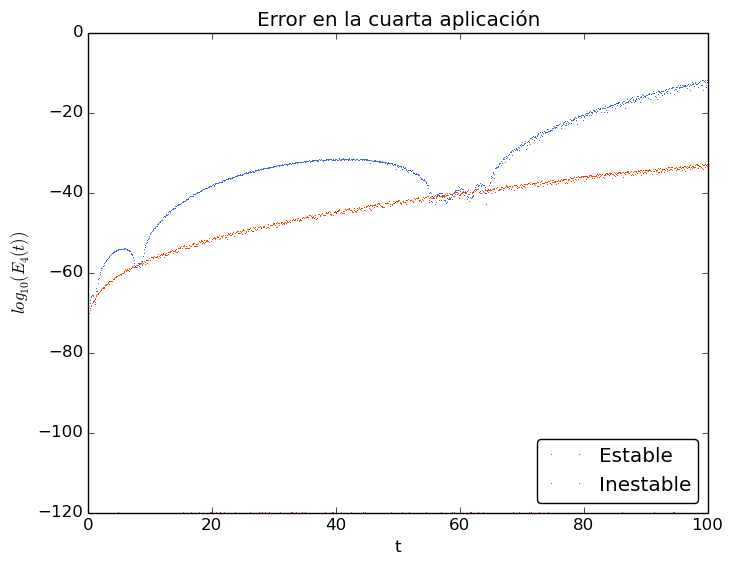

PyObject <matplotlib.legend.Legend object at 0x7effd92a2990>

In [33]:
#Error de la tercera aplicación
ValorEstable4=BigFloat[]
TiempoE4=BigFloat[]
for t =0:0.1:100
    x=ErrorEstable4(t)
    norma=norm(x,Inf)+1e-120
    push!(ValorEstable4,norma)
    push!(TiempoE4,t)
end


ValorInestable4=BigFloat[]
TiempoI4=BigFloat[]
for t =0:0.1:100
    x=ErrorInestable4(t)
    norma=norm(x,Inf)+1e-120
    push!(ValorInestable4,norma)
    push!(TiempoI4,t)
end



plot(TiempoE4,log10.(ValorEstable4),marker=",",linestyle="None",label="Estable" ,color="orangered")
plot(TiempoI4,log10.(ValorInestable4),marker=",",linestyle="None",label="Inestable",color="royalblue" )
title("Error en la cuarta aplicación")
xlabel("t")
ylabel(L"log_{10}(E_{4}(t))")
legend(loc="lower right",fancybox="true" )
    
    

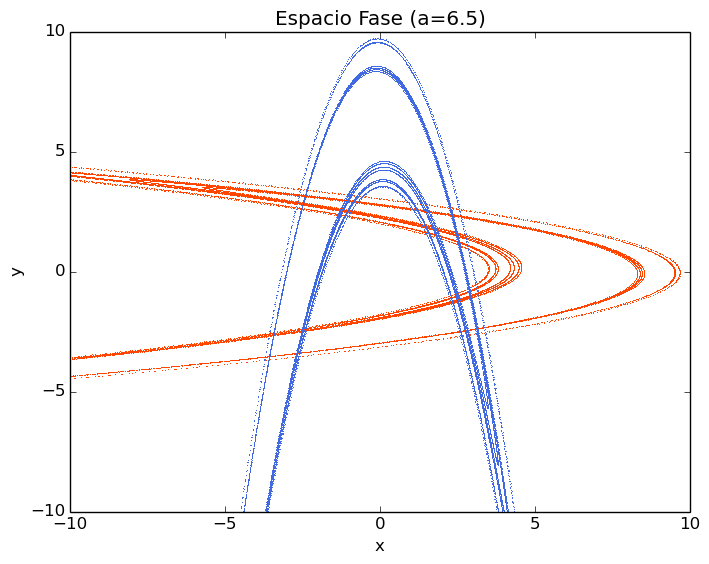

([-3.73861, -3.73861, -3.64082, -3.54344, -3.44648, -3.34993, -3.25378, -3.15805, -3.06273, -2.96782  …  -4.64563e11, -4.64589e11, -4.64615e11, -4.64641e11, -4.64667e11, -4.64693e11, -4.64719e11, -4.64745e11, -4.64771e11, -4.64797e11], [-3.73861, -3.73861, -3.03032, -2.34407, -1.67962, -1.03673, -0.415149, 0.185359, 0.765036, 1.32412  …  -2.15819e23, -2.15843e23, -2.15867e23, -2.15891e23, -2.15915e23, -2.1594e23, -2.15964e23, -2.15988e23, -2.16012e23, -2.16036e23])

In [29]:
W5_e=henon1(W4_e[1],W4_e[2]) 
W5_i=henon2(W4_i[1],W4_i[2])
evaluar([0.,-100], -0.00025, W4_e[1],W4_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], 0.00025, W4_i[1],W4_i[2],x_fijo,"royalblue")

In [30]:
ee(t)=henon1(cc(t)[1],cc(t)[2])
ErrorEstable5(t)=ee(t)-henon1(W4_e(t)[1],W4_e(t)[2])
ff(t)=henon2(dd(t)[1],dd(t)[2])
ErrorInestable4(t)=ff(t)-henon2(W4_i(t)[1],W4_i(t)[2])

ErrorInestable4 (generic function with 1 method)

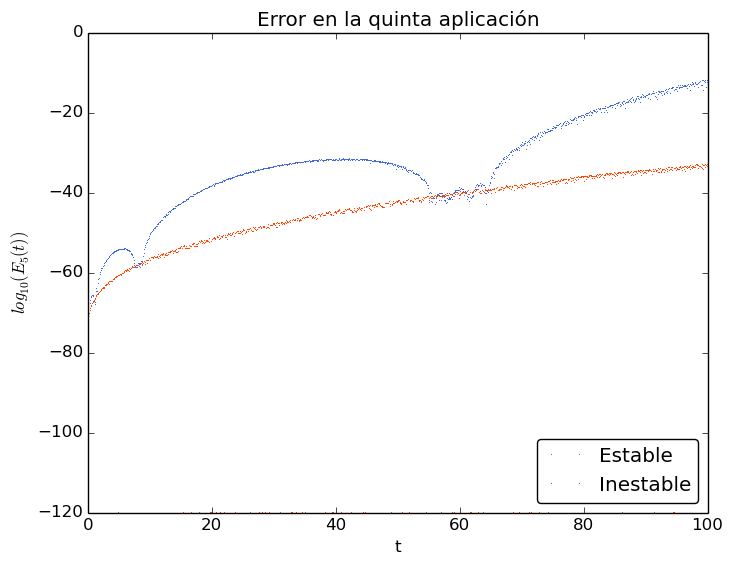

PyObject <matplotlib.legend.Legend object at 0x7effd8456b90>

In [37]:
#Error de la tercera aplicación
ValorEstable4=BigFloat[]
TiempoE4=BigFloat[]
for t =0:0.1:100
    x=ErrorEstable4(t)
    norma=norm(x,Inf)+1e-120
    push!(ValorEstable4,norma)
    push!(TiempoE4,t)
end


ValorInestable4=BigFloat[]
TiempoI4=BigFloat[]
for t =0:0.1:100
    x=ErrorInestable4(t)
    norma=norm(x,Inf)+1e-120
    push!(ValorInestable4,norma)
    push!(TiempoI4,t)
end



plot(TiempoE4,log10.(ValorEstable4),marker=",",linestyle="None",label="Estable" ,color="orangered")
plot(TiempoI4,log10.(ValorInestable4),marker=",",linestyle="None",label="Inestable",color="royalblue" )
title("Error en la quinta aplicación")
xlabel("t")
ylabel(L"log_{10}(E_{5}(t))")
legend(loc="lower right",fancybox="true" )
    

In [ ]:
W6_e=henon1(W5_e[1],W5_e[2]) 
W6_i=henon2(W5_i[1],W5_i[2])
evaluar([0.,-100], -0.000025, W6_e[1],W6_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], 0.000025, W6_i[1],W6_i[2],x_fijo,"royalblue")

In [22]:
t1=-1.36597 #este valor viene de cuando calculé las intersecciones entre variedades, está en el notebook de
# intersecciones. Es el asociado a la variedad estable
P1_e=[w_e[1](t1),w_e[2](t1)] # el primer punto es el asociado a la variedad estable evaluada en t1 que representa e
#el primer corte
P2_e=henon1(P1_e[1],P1_e[2]) # el segundo punto sería iterar el primero con el mapeo no inverso
P3_e=henon1(P2_e[1],P2_e[2])
P4_e=henon1(P3_e[1],P3_e[2])
P5_e=henon1(P4_e[1],P4_e[2])
P6_e=henon1(P5_e[1],P5_e[2])
P7_e=henon1(P6_e[1],P6_e[2])
P8_e=henon1(P7_e[1],P7_e[2])
P9_e=henon1(P8_e[1],P8_e[2])



2-element Array{Float64,1}:
 -3.0993 
 -2.68306

Los vemos en el espacio fase y sobre las gráficas

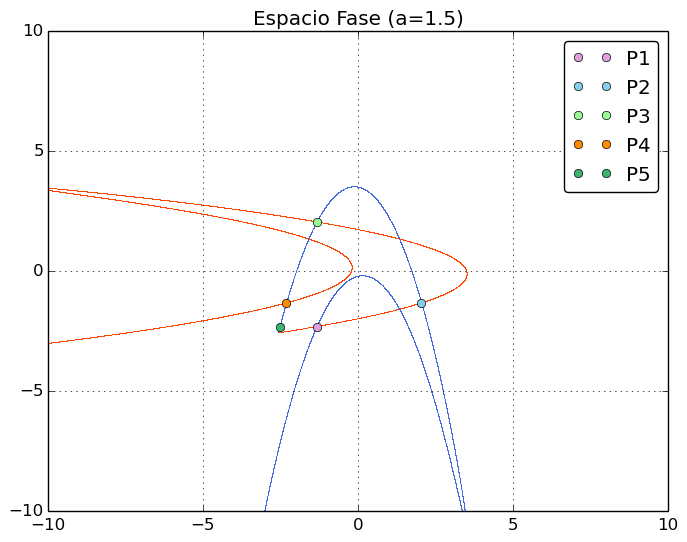

PyObject <matplotlib.legend.Legend object at 0x7fc64f1b6dd0>

In [23]:
evaluar([0.,-200], -0.025, w_e[1],w_e[2],x_fijo,"orangered")
evaluar([0.,200], 0.025, w_i[1],w_i[2],x_fijo,"royalblue")
plot([P1_e[1]],[P1_e[2]],"o",color="plum",label="P1")
plot([P2_e[1]],[P2_e[2]],"o",color="skyblue",label="P2")
plot([P3_e[1]],[P3_e[2]],"o",color="palegreen",label="P3")
plot([P4_e[1]],[P4_e[2]],"o",color="darkorange",label="P4")
plot([P5_e[1]],[P5_e[2]],"o",color="mediumseagreen",label="P5")

legend(loc="low right",fancybox="true" )


Si iteramos de nuevo los polinomios

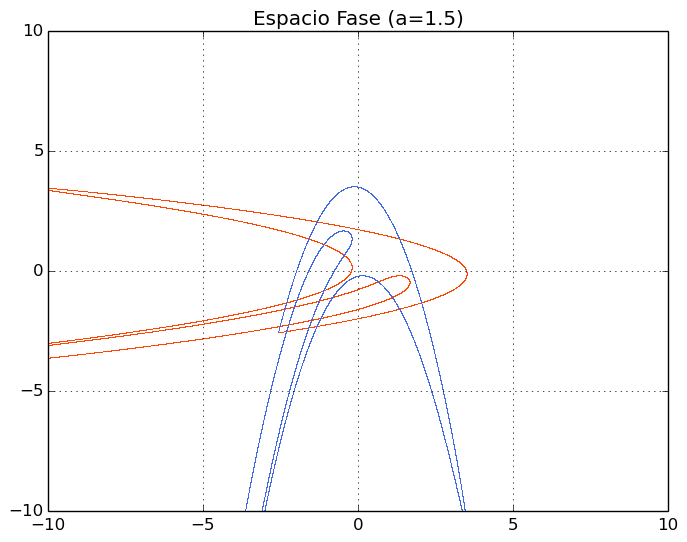

([-2.58114, -2.58114, -2.57628, -2.57142, -2.56656, -2.56171, -2.55685, -2.55201, -2.54716, -2.54231  …  -58.3624, -58.3593, -58.3562, -58.3531, -58.3499, -58.3468, -58.3437, -58.3405, -58.3374, -58.3343], [-2.58114, -2.58114, -2.55705, -2.53301, -2.50904, -2.48512, -2.46127, -2.43747, -2.41374, -2.39006  …  -3397.13, -3396.76, -3396.4, -3396.03, -3395.67, -3395.3, -3394.94, -3394.57, -3394.21, -3393.84])

In [24]:
w2_e=henon1(w1e[1],w1e[2])
w2_i=henon2(w1i[1],w1i[2])
delta = 100/100000
evaluar([0.,-100], -delta, w2_e[1],w2_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], delta, w2_i[1],w2_i[2],x_fijo,"royalblue")

Junto con los puntos

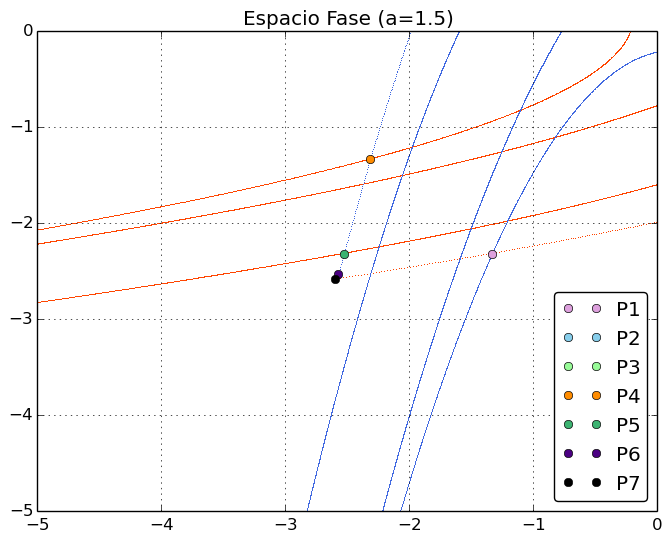

PyObject <matplotlib.legend.Legend object at 0x7fc64eb4ca10>

In [25]:

evaluar([0.,-100], -delta, w2_e[1],w2_e[2],x_fijo,"orangered") #el valor del parámetro sigue siendo 100
evaluar([0.,100], delta, w2_i[1],w2_i[2],x_fijo,"royalblue")
plot([P1_e[1]],[P1_e[2]],"o",color="plum",label="P1")
plot([P2_e[1]],[P2_e[2]],"o",color="skyblue",label="P2")
plot([P3_e[1]],[P3_e[2]],"o",color="palegreen",label="P3")
plot([P4_e[1]],[P4_e[2]],"o",color="darkorange",label="P4")
plot([P5_e[1]],[P5_e[2]],"o",color="mediumseagreen",label="P5")
plot([P6_e[1]],[P6_e[2]],"o",color="indigo",label="P6")
plot([P7_e[1]],[P7_e[2]],"o",color="k",label="P7")



xlim(-5,0)
ylim(-5,0)
legend(loc="low right",fancybox="true" )

Ahora si usamos BigFloat para llegar más lejos

In [26]:
a=parse(BigFloat,"1.5")
uno = parse(BigFloat,"1.")
henon3(x,y)=Henon(x,y,a,uno)
henon4(x,y)=HenonI(x,y,a,uno)
punto2 = parametro(a)

2-element Array{BigFloat,1}:
 -2.581138830084189665999446772216359266859777569662608413428752426396297219319615
 -2.581138830084189665999446772216359266859777569662608413428752426396297219319615

In [27]:
Orden = 80
x_fijo = [punto2[1],punto2[2]]
tiempo = [big(0.),big(3.)]
delta_t = big(tiempo[2]/1000)
W_eB, f_eB, vec_eB, val_eB = Inestable(henon4,80,punto2,tiempo, delta_t)
W_iB, f_iB, vec_iB, val_iB = Inestable(henon3, 80 ,punto2, tiempo, delta_t)

(TaylorSeries.Taylor1{BigFloat}[ - 2.581138830084189665999446772216359266859777569662608413428752426396297219319615 + 1.976096496280411299893517888473283564268459937931934769519718064126592279387433e-01 t - 2.003895331025972196342622826021202503295145606791121461644344458822853575775757e-03 t² + 6.773617424159552153953923390837421197183529244210541087841269515123780312752925e-06 t³ - 1.11466993205147455157327998961640353180987613125678166035321200632683025090382e-08 t⁴ + 1.052133282947635853285857814433379452760584357967862732891384175316328496909155e-11 t⁵ - 6.357838642827248153524793571725232426451796352736420739421144748094079986624664e-15 t⁶ + 2.647255640946963122270053111557294719608588652246241179109925113078753619570912e-18 t⁷ - 7.998263760368929876568370460832463675045213388880502623760589498704957638051457e-22 t⁸ + 1.822854006043945421375534052614212331695279878558791323880740222662535284988522e-25 t⁹ - 3.230947113742378049636580195960056232395326636193016581306484357213698546

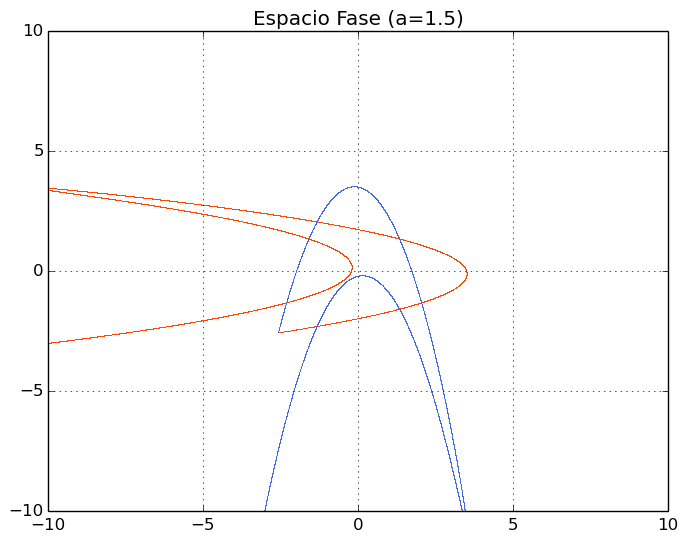

([-2.58114, -2.58114, -2.5762, -2.57126, -2.56633, -2.5614, -2.55647, -2.55154, -2.54662, -2.5417  …  -3.85026, -3.85213, -3.854, -3.85587, -3.85774, -3.85961, -3.86147, -3.86334, -3.86521, -3.86708], [-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -15.8653, -15.8801, -15.8948, -15.9096, -15.9243, -15.9391, -15.9538, -15.9686, -15.9834, -15.9982])

In [28]:
figure(7)
evaluar([0.,-big(200.)], -big(0.025), W_eB[1],W_eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.025), W_iB[1],W_iB[2],x_fijo,"royalblue")

In [29]:
W1_eB=henon3(W_eB[1],W_eB[2])
W1_iB=henon4(W_iB[1],W_iB[2])

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

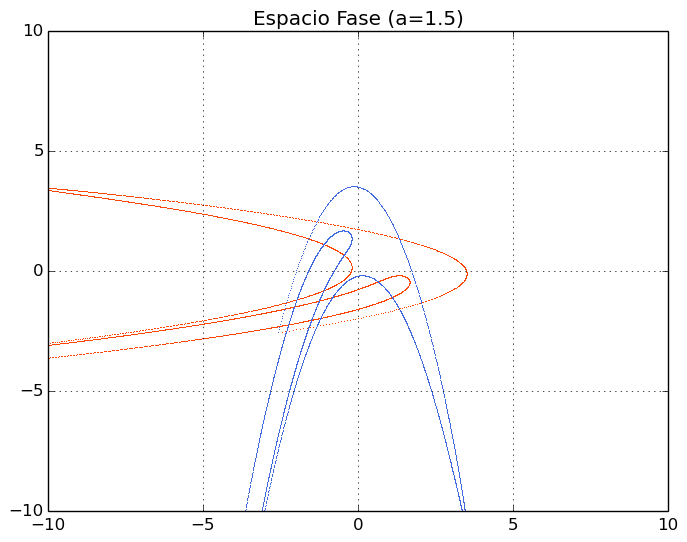

([-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -15.8653, -15.8801, -15.8948, -15.9096, -15.9243, -15.9391, -15.9538, -15.9686, -15.9834, -15.9982], [-2.58114, -2.58114, -2.46032, -2.34102, -2.22321, -2.10689, -1.99204, -1.87867, -1.76676, -1.6563  …  -246.358, -246.824, -247.291, -247.758, -248.226, -248.694, -249.163, -249.633, -250.103, -250.574])

In [30]:
figure(8)
evaluar([0.,-big(200.)], -big(0.025), W1_eB[1],W1_eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.025), W1_iB[1],W1_iB[2],x_fijo,"royalblue")

Con un parámetro diferente para poder observar mejor

In [31]:
b=parse(BigFloat,"6.5")
uno = parse(BigFloat,"1.")
henon5(x,y)=Henon(x,y,b,uno)
henon6(x,y)=HenonI(x,y,b,uno)
punto3 = parametro(b)

2-element Array{BigFloat,1}:
 -3.738612787525830567284848914004010669763723474989916271134472248662466385613599
 -3.738612787525830567284848914004010669763723474989916271134472248662466385613599

In [32]:
Orden = 80
x_fijo = [punto3[1],punto3[2]]
tiempo = [big(0.),big(3.)]
delta_t = big(tiempo[2]/1000)
WeB, feB, veceB, valeB = Inestable(henon6,80,punto3,tiempo, delta_t)
WiB, fiB, veciB, valiB = Inestable(henon5, 80 ,punto3, tiempo, delta_t)

(TaylorSeries.Taylor1{BigFloat}[ - 3.738612787525830567284848914004010669763723474989916271134472248662466385613599 + 1.349745895320868343244395630874548137937707343579803914045013496316834721909717e-01 t - 3.923644611672057779631016898473830135083008542917288561154824126391027632259466e-04 t² + 2.728910843490695084562114682663454274050735317814259997008059638359561191635812e-07 t³ - 7.85780999815163840995996336384453830412588861014878569989515321489595872607727e-11 t⁴ + 1.104340944550915029731083557276316369748632617335301680612593413838333529221457e-14 t⁵ - 8.889067535400140522287058989077631146199687493073241010675363371377915007271759e-19 t⁶ + 4.507978839517103906487058313416717692293615341051414253678794557030322126952734e-23 t⁷ - 1.530855968839874958459564946785084768714519559160989039383409201393915348541894e-27 t⁸ + 3.644448795996392901718666371865793436475224658188963088143238760466974548139488e-32 t⁹ - 6.324644880881850454670246713403620124299227213193025375068308257830707563

Conjunto fundamental

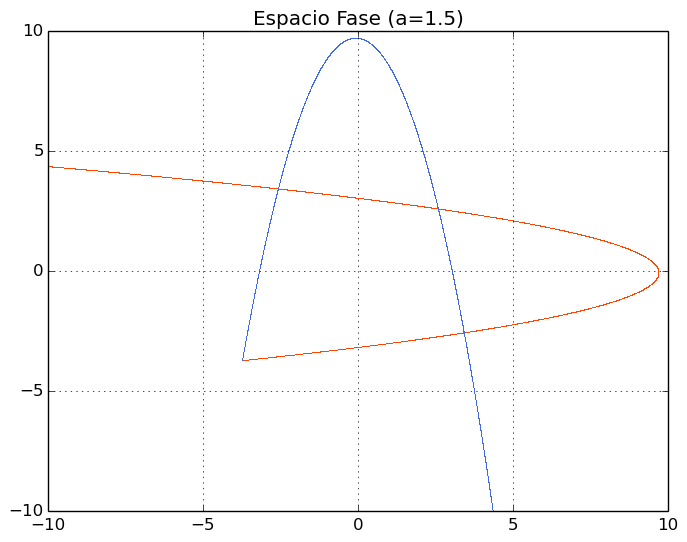

([-3.73861, -3.73861, -3.73524, -3.73187, -3.72849, -3.72512, -3.72175, -3.71838, -3.715, -3.71163  …  9.62051, 9.62072, 9.62093, 9.62114, 9.62135, 9.62156, 9.62177, 9.62198, 9.62219, 9.6224], [-3.73861, -3.73861, -3.71385, -3.68912, -3.66442, -3.63974, -3.61509, -3.59046, -3.56586, -3.54129  …  -85.7031, -85.7076, -85.7121, -85.7165, -85.721, -85.7254, -85.7298, -85.7343, -85.7387, -85.7431])

In [33]:

evaluar([0.,-big(200.)], -big(0.025), WeB[1],WeB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.025), WiB[1],WiB[2],x_fijo,"royalblue")

Primera iteración

In [34]:
W1eB=henon5(WeB[1],WeB[2])
W1iB=henon6(WiB[1],WiB[2])

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

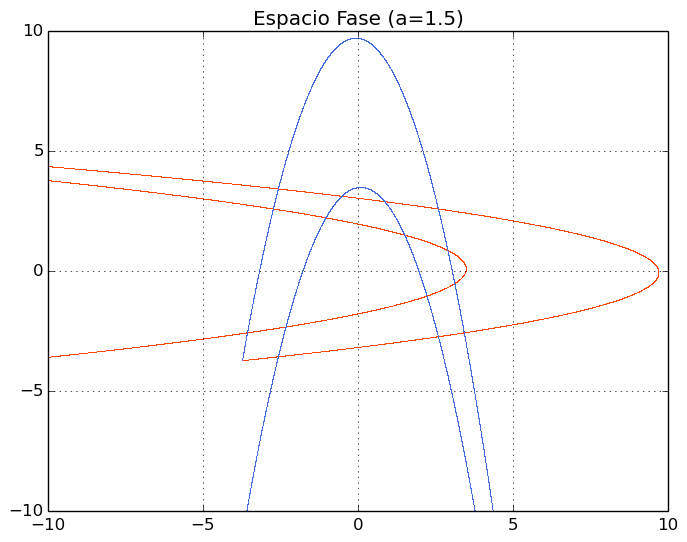

([-3.73861, -3.73861, -3.73614, -3.73366, -3.73118, -3.72871, -3.72623, -3.72375, -3.72128, -3.7188  …  -85.7431, -85.7435, -85.744, -85.7444, -85.7448, -85.7453, -85.7457, -85.7462, -85.7466, -85.7471], [-3.73861, -3.73861, -3.72044, -3.70227, -3.68412, -3.66599, -3.64787, -3.62976, -3.61167, -3.59359  …  -7355.0, -7355.07, -7355.15, -7355.23, -7355.3, -7355.38, -7355.45, -7355.53, -7355.6, -7355.68])

In [35]:
evaluar([0.,-big(200.)], -big(0.0025), W1eB[1],W1eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.0025), W1iB[1],W1iB[2],x_fijo,"royalblue")

Segunda iteración

In [36]:
W2eB=henon5(W1eB[1],W1eB[2])
W2iB=henon6(W1iB[1],W1iB[2])

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

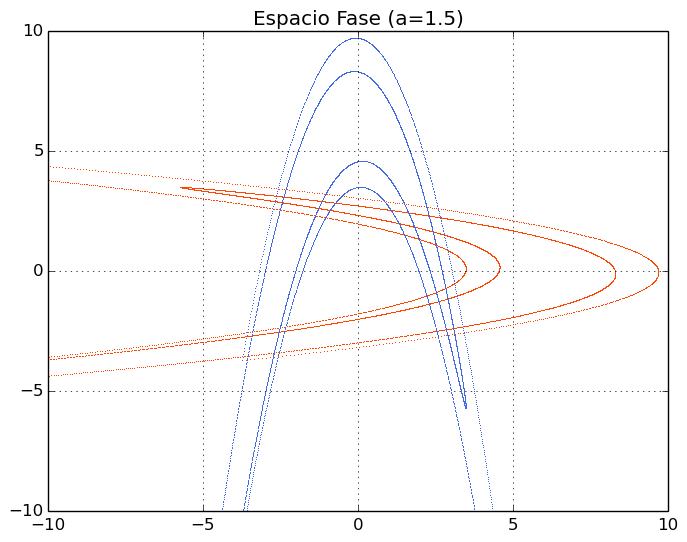

([-3.73861, -3.73861, -3.72044, -3.70227, -3.68412, -3.66599, -3.64787, -3.62976, -3.61167, -3.59359  …  -7355.0, -7355.07, -7355.15, -7355.23, -7355.3, -7355.38, -7355.45, -7355.53, -7355.6, -7355.68], [-3.73861, -3.73861, -3.6055, -3.47316, -3.34158, -3.21076, -3.08071, -2.95141, -2.82288, -2.6951  …  -5.40959e7, -5.4097e7, -5.40981e7, -5.40993e7, -5.41004e7, -5.41015e7, -5.41026e7, -5.41037e7, -5.41048e7, -5.41059e7])

In [37]:
evaluar([0.,-big(200.)], -big(0.0025), W2eB[1],W2eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.0025), W2iB[1],W2iB[2],x_fijo,"royalblue")

Tercera iteración

In [38]:
W3eB=henon5(W2eB[1],W2eB[2])
W3iB=henon6(W2iB[1],W2iB[2])

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
  - 3.738612787525830567284848914004010669763723474989916271134472248662466385612494 + 5.339719879019797811606856560130797639685465922525880577564502672437603452280471e+01 t - 6.140766476122564037861769183294093601001017646227055137298669703352070359419204e+01 t² + 1.689618766424976027991813850741110627403147127237210043338263269927461832490392e+01 t³ - 1.924719117679400733116178463488634380843367982639166842491378055108885850981195 t⁴ + 1.070127365934443703543832365576039660638078504116173046639247862554780604495532e-01 t⁵ - 3.407649834250746504952671642228900271732383420689018184591532644612764152086927e-03 t⁶ + 6.83670881387621852774414087017097729366821327493739480005820207183619324397915e-05 t⁷ - 9.184721777599512390136339052791091281871717247960151382868421096751542288775476e-07 t⁸ + 8.650276416099533342387331408269609148293789712244980713768197999800070746174396e-09 t⁹ - 5.93882786122083669020668833672247112411459708730959066612

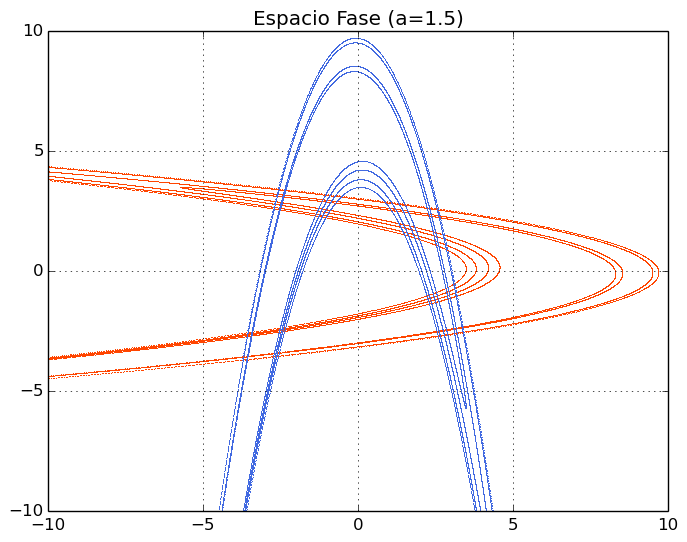

([-3.73861, -3.73861, -3.72527, -3.71193, -3.6986, -3.68528, -3.67196, -3.65866, -3.64536, -3.63206  …  -5.41059e7, -5.4106e7, -5.41062e7, -5.41063e7, -5.41064e7, -5.41065e7, -5.41066e7, -5.41067e7, -5.41068e7, -5.41069e7], [-3.73861, -3.73861, -3.64082, -3.54344, -3.44648, -3.34993, -3.25378, -3.15805, -3.06273, -2.96782  …  -2.92745e15, -2.92746e15, -2.92748e15, -2.92749e15, -2.9275e15, -2.92751e15, -2.92752e15, -2.92754e15, -2.92755e15, -2.92756e15])

In [39]:
evaluar([0.,-big(200.)], -big(0.00025), W3eB[1],W3eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.00025), W3iB[1],W3iB[2],x_fijo,"royalblue")

Cuarta iteración

In [40]:
W4eB=henon5(W3eB[1],W3eB[2])
W4iB=henon6(W3iB[1],W3iB[2])

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
  - 3.738612787525830567284848914004010669763723474989916271134472248662466385605447 + 3.919890730854674704073053271366222934335881015493679455005897236949942139497188e+02 t - 3.30928030723385586447807105593943523516766931054872508094953687768788525046389e+03 t² + 6.684288462236498558231203703345491479701639467672629496798999673265376524079599e+03 t³ - 5.589710370704042542881657974552033570090212995947179975594171118828758185752026e+03 t⁴ + 2.281460227693494307648699989573793058332381246413026911065648466453101246060037e+03 t⁵ - 5.333200107441478322093956148924805307088377935611298815816489771201372123355155e+02 t⁶ + 7.854806444167805945010436706851796143652495207729425854783308872505708668660489e+01 t⁷ - 7.746577968762383700848075293434279816469560235762957593434747052231381406042666 t⁸ + 5.355861809215238296486078704569623377403270756652733704681504444073688770072473e-01 t⁹ - 2.69932763686855819128776459190471914521827908162832906297

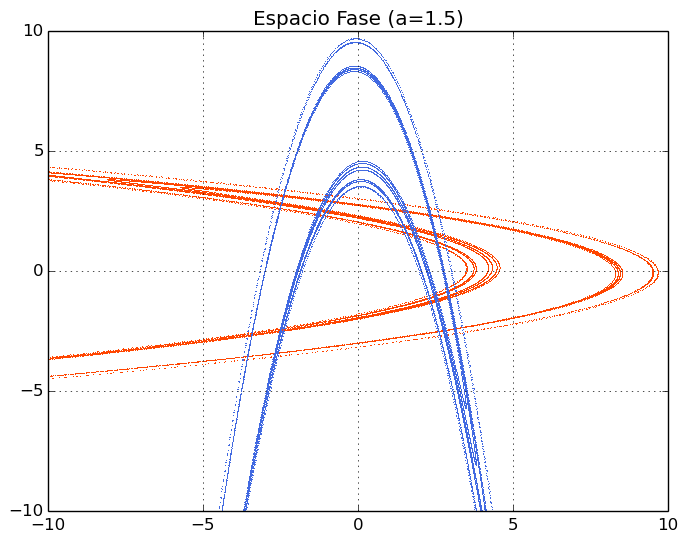

([-3.73861, -3.73861, -3.64082, -3.54344, -3.44648, -3.34993, -3.25378, -3.15805, -3.06273, -2.96782  …  -2.92745e15, -2.92746e15, -2.92748e15, -2.92749e15, -2.9275e15, -2.92751e15, -2.92752e15, -2.92754e15, -2.92755e15, -2.92756e15], [-3.73861, -3.73861, -3.03032, -2.34407, -1.67962, -1.03673, -0.415149, 0.185359, 0.765036, 1.32412  …  -8.56997e30, -8.57004e30, -8.57011e30, -8.57018e30, -8.57026e30, -8.57033e30, -8.5704e30, -8.57047e30, -8.57054e30, -8.57061e30])

In [41]:
evaluar([0.,-big(200.)], -big(0.00025), W4eB[1],W4eB[2],x_fijo,"orangered")
evaluar([0.,big(200.)], big(0.00025), W4iB[1],W4iB[2],x_fijo,"royalblue")

In [1]:
?CalculoError

search:

Couldn't find CalculoError
Perhaps you meant UnicodeError


No documentation found.

Binding `CalculoError` does not exist.
